<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Slinky%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 0. Ping Pong Ball Free Fall

In [ ]:
tlist = np.array([(1/30)*i for i in range(27)])
ylist = np.array([1.91, 1.91, 1.87, 1.83, 1.77, 1.69, 1.62, 1.53, 1.41, 1.29,
         1.15, 1.03, 0.882, 0.731, 0.563, 0.408, 0.226, 0.0587, -0.106,
         -0.29, -0.466, -0.643, -0.833, -1, -1.17, -1.37, -1.63])

In [ ]:
def func(t, b, a):
    return b - 0.5 * a * t**2
popt, pcov = curve_fit(func, tlist, ylist, p0 = [1.91, 9.8])

In [ ]:
popt

array([1.74829431, 9.5306956 ])

In [ ]:
pcov

array([[0.00128195, 0.00548102],
       [0.00548102, 0.04295722]])

Text(0, 0.5, 'Vertial Position')

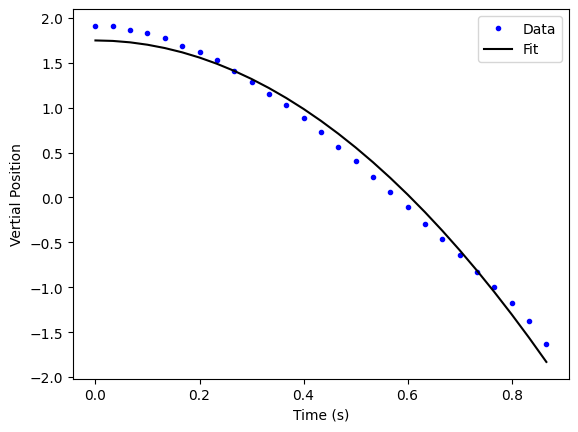

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(tlist, func(tlist, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position')

# 1. Point Mass Modeling (Free Fall)

In [ ]:
# Constant Initialization

N = 10                    # of point mass
omega = 2 * np.pi * 10   # w**2 := k/m, Hz
g = 9.8                   # m/s**2
L_0 = 0.02             # natural length

delta = g / omega ** 2    # stationary length

t_step = 100000
tlist = np.linspace(0,2,t_step)

In [ ]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*L_0])

Y_0 = np.array(lst)

In [ ]:
Y_0

array([[-0.        ],
       [-0.04482369],
       [-0.08716501],
       [-0.12702396],
       [-0.16440055],
       [-0.19929476],
       [-0.2317066 ],
       [-0.26163608],
       [-0.28908319],
       [-0.31404793],
       [-0.33653029]])

In [ ]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [ ]:
A

array([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1]])

In [ ]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [ ]:
N_crit

8

In [ ]:
D

array([-3.91898595e+00, -3.68250707e+00, -3.30972147e+00, -2.83083003e+00,
       -2.28462968e+00, -1.71537032e+00, -1.16916997e+00, -6.90278532e-01,
        4.39245429e-16, -8.10140528e-02, -3.17492934e-01])

In [ ]:
P

array([[-6.06832509e-02, -1.20131166e-01, -1.77133557e-01,
        -2.30530019e-01, -2.79233555e-01, -3.22252701e-01,
        -3.58711712e-01, -3.87868386e-01,  3.01511345e-01,
         4.22061281e-01,  4.09129179e-01],
       [ 1.77133557e-01,  3.22252701e-01,  4.09129179e-01,
         4.22061281e-01,  3.58711712e-01,  2.30530019e-01,
         6.06832509e-02, -1.20131166e-01,  3.01511345e-01,
         3.87868386e-01,  2.79233555e-01],
       [-2.79233555e-01, -4.22061281e-01, -3.58711712e-01,
        -1.20131166e-01,  1.77133557e-01,  3.87868386e-01,
         4.09129179e-01,  2.30530019e-01,  3.01511345e-01,
         3.22252701e-01,  6.06832509e-02],
       [ 3.58711712e-01,  3.87868386e-01,  6.06832509e-02,
        -3.22252701e-01, -4.09129179e-01, -1.20131166e-01,
         2.79233555e-01,  4.22061281e-01,  3.01511345e-01,
         2.30530019e-01, -1.77133557e-01],
       [-4.09129179e-01, -2.30530019e-01,  2.79233555e-01,
         3.87868386e-01, -6.06832509e-02, -4.22061281e-01,
  

In [ ]:
P_dag

array([[-6.06832509e-02,  1.77133557e-01, -2.79233555e-01,
         3.58711712e-01, -4.09129179e-01,  4.26401433e-01,
        -4.09129179e-01,  3.58711712e-01, -2.79233555e-01,
         1.77133557e-01, -6.06832509e-02],
       [-1.20131166e-01,  3.22252701e-01, -4.22061281e-01,
         3.87868386e-01, -2.30530019e-01, -4.47181304e-15,
         2.30530019e-01, -3.87868386e-01,  4.22061281e-01,
        -3.22252701e-01,  1.20131166e-01],
       [-1.77133557e-01,  4.09129179e-01, -3.58711712e-01,
         6.06832509e-02,  2.79233555e-01, -4.26401433e-01,
         2.79233555e-01,  6.06832509e-02, -3.58711712e-01,
         4.09129179e-01, -1.77133557e-01],
       [-2.30530019e-01,  4.22061281e-01, -1.20131166e-01,
        -3.22252701e-01,  3.87868386e-01,  4.89641465e-16,
        -3.87868386e-01,  3.22252701e-01,  1.20131166e-01,
        -4.22061281e-01,  2.30530019e-01],
       [-2.79233555e-01,  3.58711712e-01,  1.77133557e-01,
        -4.09129179e-01, -6.06832509e-02,  4.26401433e-01,
  

In [ ]:
X_0 = np.matmul(P_dag, Y_0)

In [ ]:
X_0

array([[-4.22818671e-04],
       [-2.19566594e-03],
       [-1.46139770e-03],
       [-5.48110163e-03],
       [-3.33741963e-03],
       [-1.26442431e-02],
       [-8.37774094e-03],
       [-3.78193602e-02],
       [-6.19820509e-01],
       [ 3.50646345e-01],
       [ 3.51872570e-02]])

In [ ]:
X_0[N_crit][0]

-0.6198205086943424

In [ ]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * L_0])

  elif i==N:
    lst.append([g + omega**2 * L_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [ ]:
G

array([[-69.15683521],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [ 88.75683521]])

In [ ]:
H

array([[ 3.73034936e-14],
       [ 1.89703533e+01],
       [-1.42108547e-13],
       [ 3.64038415e+01],
       [-6.03961325e-14],
       [ 5.08881069e+01],
       [ 6.75015599e-14],
       [ 6.12497205e+01],
       [ 3.25029229e+01],
       [-6.66492460e+01],
       [-4.26325641e-14]])

In [ ]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [ ]:
A_coeff

array([[-4.22818671e-04],
       [-8.90781374e-04],
       [-1.46139770e-03],
       [-2.22368219e-03],
       [-3.33741963e-03],
       [-5.12976770e-03],
       [-8.37774094e-03],
       [-1.53433093e-02],
       [-1.87437046e+13],
       [ 1.42257174e-01],
       [ 3.51872570e-02]])

In [ ]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [ ]:
X

array([[-4.22818671e-04, -4.22817363e-04, -4.22813438e-04, ...,
         3.54026934e-04,  3.53450748e-04,  3.52872375e-04],
       [-2.19566594e-03, -2.19566335e-03, -2.19565558e-03, ...,
        -6.59564754e-04, -6.58085862e-04, -6.56610731e-04],
       [-1.46139770e-03, -1.46139388e-03, -1.46138243e-03, ...,
         1.09348647e-03,  1.09570011e-03,  1.09790802e-03],
       ...,
       [-6.19820509e-01, -6.19820515e-01, -6.19820535e-01, ...,
        -6.56230662e+01, -6.56243663e+01, -6.56256664e+01],
       [ 3.50646345e-01,  3.50646336e-01,  3.50646308e-01, ...,
         1.58087846e-01,  1.58135445e-01,  1.58183050e-01],
       [ 3.51872570e-02,  3.51872482e-02,  3.51872217e-02, ...,
        -4.20757934e-03, -4.23231485e-03, -4.25704823e-03]])

In [ ]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [ ]:
Y

array([[-6.93889390e-18, -2.15604284e-08, -8.62416795e-08, ...,
        -1.97155098e+01, -1.97158888e+01, -1.97162677e+01],
       [-4.48236900e-02, -4.48236900e-02, -4.48236900e-02, ...,
        -1.97270886e+01, -1.97274645e+01, -1.97278404e+01],
       [-8.71650110e-02, -8.71650110e-02, -8.71650110e-02, ...,
        -1.97391933e+01, -1.97395738e+01, -1.97399544e+01],
       ...,
       [-2.89083188e-01, -2.89083188e-01, -2.89083188e-01, ...,
        -1.98298089e+01, -1.98302210e+01, -1.98306331e+01],
       [-3.14047926e-01, -3.14047926e-01, -3.14047926e-01, ...,
        -1.98460301e+01, -1.98464469e+01, -1.98468637e+01],
       [-3.36530295e-01, -3.36530295e-01, -3.36530295e-01, ...,
        -1.98645651e+01, -1.98649888e+01, -1.98654125e+01]])

Text(0, 0.5, 'Vertical Postion')

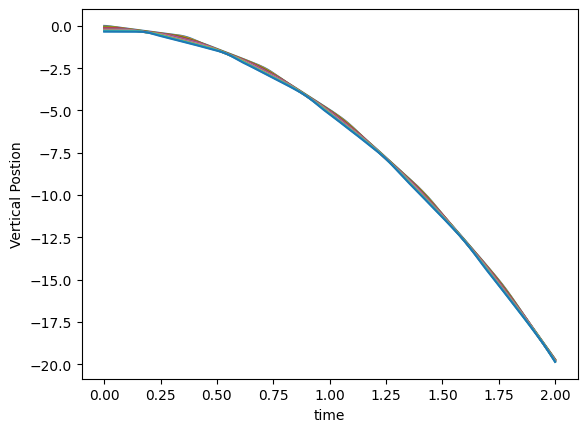

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position (m)')

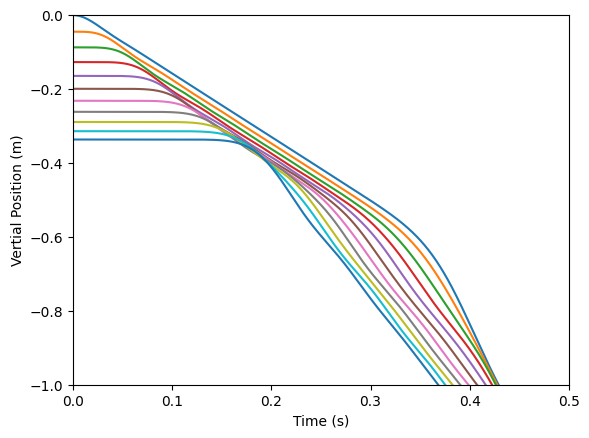

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0,0.5)
plt.ylim(-1,0)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertial Position (m)')

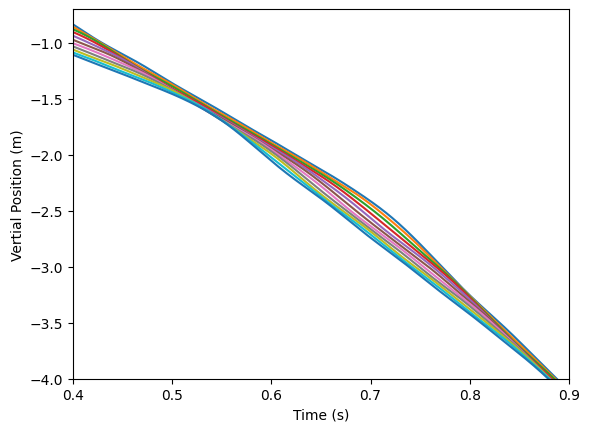

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0.4,0.9)
plt.ylim(-4,-0.7)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

# 2. Free Fall Analysis

In [234]:
tlist = np.array([(1/30)*i for i in range(13)])
ylist1 = np.array([0.0, -0.0437, -0.1758, -0.2807, -0.3922, -0.5037, -0.6205, -0.7147, -0.8132, -0.8867, -0.9766, -1.0662, -1.1723])
ylist2 = np.array([-0.0952, -0.1061, -0.3102, -0.3271, -0.4097, -0.5199, -0.6378, -0.7327, -0.826, -0.9026, -0.9913, -1.0969, -1.2163])
ylist3 = np.array([-0.3179, -0.3148, -0.3102, -0.3301, -0.4113, -0.5184, -0.6439, -0.7403, -0.8337, -0.9209, -1.0036, -1.1168, -1.2323])
ylist4 = np.array([-0.4419, -0.4342, -0.4342, -0.4281, -0.4419, -0.5444, -0.6546, -0.751, -0.8459, -0.9362, -1.0143, -1.1505, -1.2515])
ylist5 = np.array([-0.673, -0.673, -0.673, -0.673, -0.6776, -0.6806, -0.676, -0.7648, -0.8597, -0.9561, -1.0602, -1.1888, -1.3035])
ylist6 = np.array([-0.8459, -0.852, -0.8566, -0.8643, -0.8674, -0.875, -0.875, -0.8781, -0.8811, -0.9837, -1.1107, -1.2178, -1.3388])

In [235]:
Nlist = [0,5,20,29,50,74]

In [237]:
# Constant Initialization

N = 100                     # of point mass
omega = 2 * np.pi * 37.959      # w**2 := k/m, Hz
g = 9.8                     # m/s**2
L_0 = 0.0005                # natural length

delta = g / omega ** 2    # stationary length

t_step = 13
tlist = np.linspace(0,0.4,t_step)

In [238]:
tlist

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       ])

In [239]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*L_0])

Y_0 = np.array(lst)

In [240]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [241]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [242]:
X_0 = np.matmul(P_dag, Y_0)

In [243]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * L_0])

  elif i==N:
    lst.append([g + omega**2 * L_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [244]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [245]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [246]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

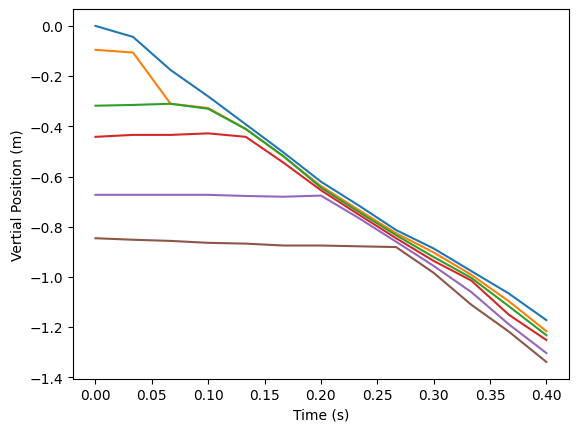

In [254]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)
plt.plot(tlist, ylist5)
plt.plot(tlist, ylist6)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

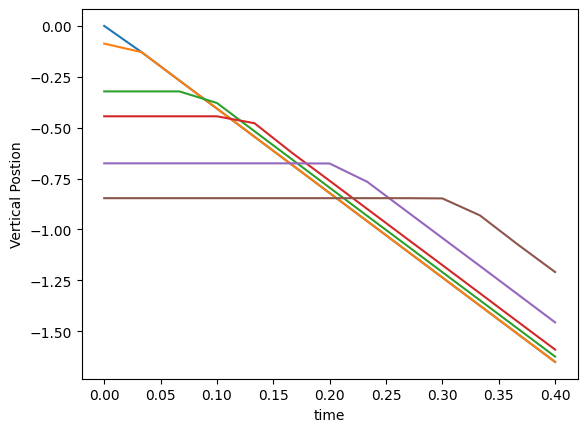

In [247]:
plt.figure()

plt.plot(tlist, Y[0])
plt.plot(tlist, Y[5])
plt.plot(tlist, Y[20])
plt.plot(tlist, Y[29])
plt.plot(tlist, Y[50])
plt.plot(tlist, Y[74])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

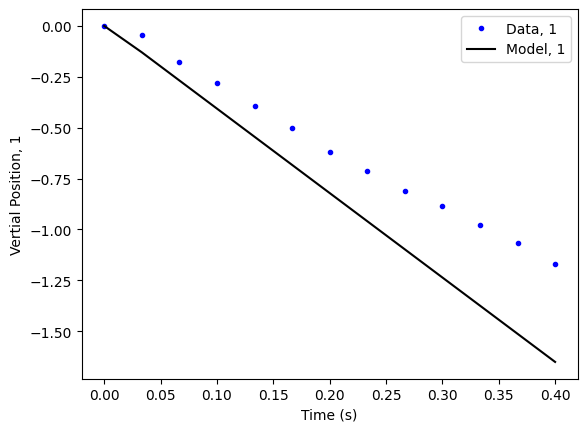

In [248]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[0], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

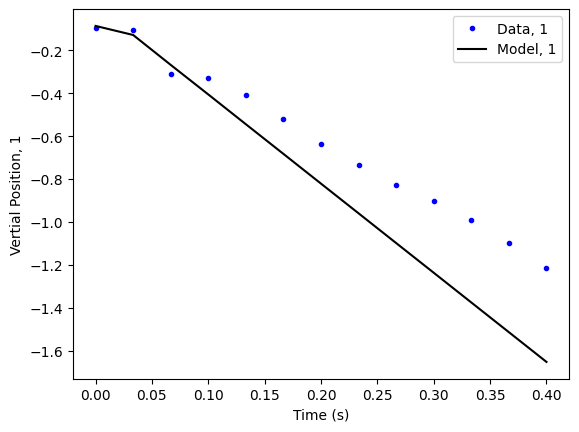

In [249]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[5], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

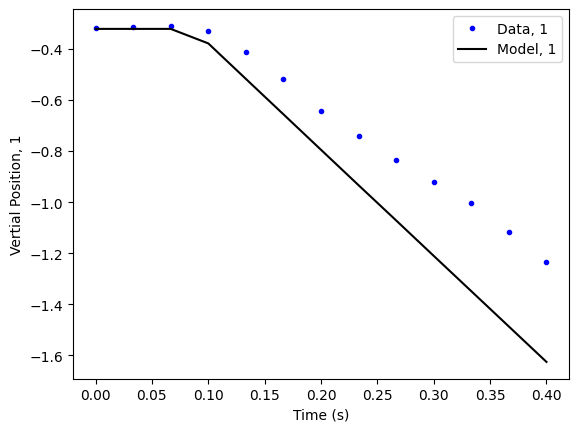

In [250]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[20], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

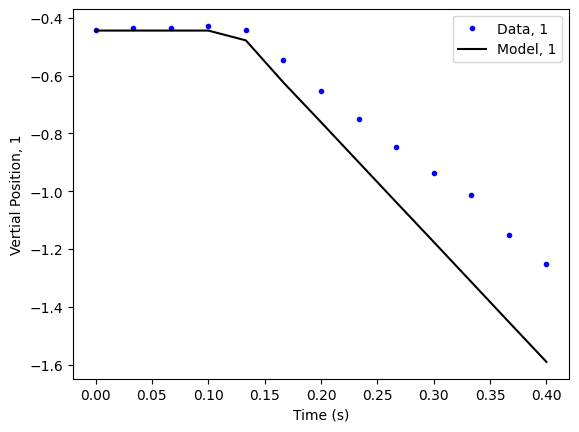

In [251]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[29], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

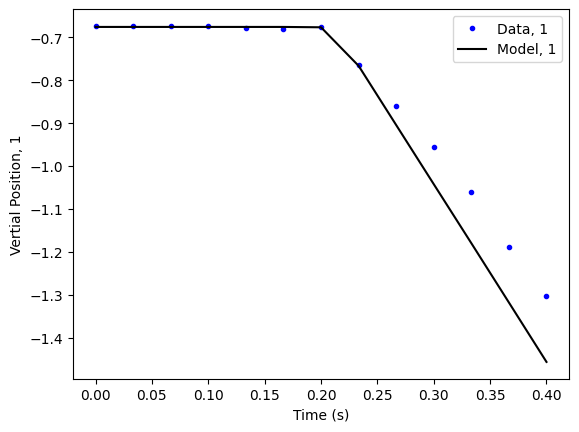

In [252]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist5, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[50], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

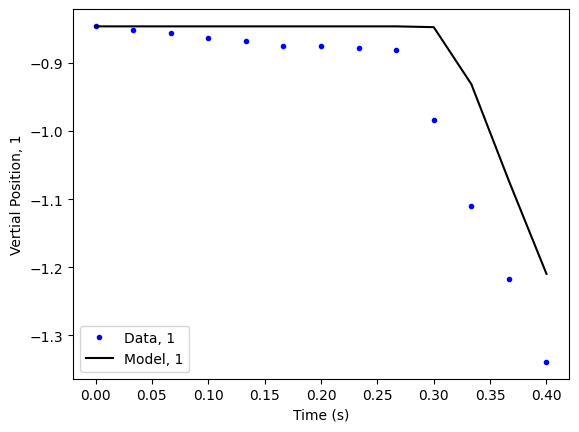

In [253]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist6, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[74], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

# 3. Point Mass Modeling (Transverse Wave & Longitudinal Wave)

In [148]:
# Constant Initialization

N = 100                    # of point mass
omega = 2 * np.pi * 1   # w**2 := k/m, Hz
omega_0 = 2 * np.pi * 2   # w**2 := k/m, Hz
Amp = 10

t_step = 10000
tlist = np.linspace(0,200,t_step)

In [149]:
# Position initialization

lst = []
for i in range(N-2):

    lst.append([0])

lst.append([(omega**2)*Amp])

a_0 = np.array(lst)

In [150]:
a_0

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0

In [151]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N-1):

  if i==0:
    sub_lst = []
    for j in range(N-1):

      if j==0:
        sub_lst.append(-2)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N-2:
    sub_lst = []
    for j in range(N-1):

      if j==N-3:
        sub_lst.append(+1)

      elif j==N-2:
        sub_lst.append(-2)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N-1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [152]:
A

array([[-2,  1,  0, ...,  0,  0,  0],
       [ 1, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -2,  1,  0],
       [ 0,  0,  0, ...,  1, -2,  1],
       [ 0,  0,  0, ...,  0,  1, -2]])

In [153]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

In [154]:
D

array([-3.99901312e+00, -3.99605346e+00, -3.99112393e+00, -3.98422940e+00,
       -3.97537668e+00, -3.96457450e+00, -3.95183352e+00, -3.93716632e+00,
       -3.83550925e+00, -3.85955297e+00, -3.88176154e+00, -3.80965410e+00,
       -3.78201305e+00, -3.75261336e+00, -3.90211303e+00, -3.72148405e+00,
       -3.58031002e+00, -3.61803399e+00, -3.54102649e+00, -3.50022214e+00,
       -3.65416115e+00, -3.45793725e+00, -3.41421356e+00, -3.36909421e+00,
       -3.92058737e+00, -3.22581411e+00, -3.17557050e+00, -3.12416676e+00,
       -3.07165359e+00, -3.27484798e+00, -3.01808283e+00, -2.96350735e+00,
       -2.90798100e+00, -2.67747584e+00, -2.73624911e+00, -2.79429578e+00,
       -2.61803399e+00, -2.55798221e+00, -2.49737977e+00, -9.86879269e-04,
       -3.94654314e-03, -8.87607079e-03, -1.57705974e-02, -2.46233188e-02,
       -2.43628648e+00, -3.54254985e-02, -4.81664761e-02, -2.37476263e+00,
       -6.28336777e-02, -9.78869674e-02, -1.18238462e-01, -1.40447028e-01,
       -1.64490749e-01, -

In [155]:
P

array([[-0.00444215, -0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 ,  0.07577735],
       [ 0.00887992,  0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735,  0.12796187],
       [-0.01330893, -0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172,  0.14030621],
       ...,
       [-0.01330893,  0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172, -0.14030621],
       [ 0.00887992, -0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735, -0.12796187],
       [-0.00444215,  0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 , -0.07577735]])

In [156]:
P_dag

array([[-0.00444215,  0.00887992, -0.01330893, ..., -0.01330893,
         0.00887992, -0.00444215],
       [-0.00887992,  0.0177248 , -0.02649972, ...,  0.02649972,
        -0.0177248 ,  0.00887992],
       [-0.01330893,  0.02649972, -0.0394553 , ..., -0.0394553 ,
         0.02649972, -0.01330893],
       ...,
       [ 0.10608172,  0.14030621,  0.07949059, ...,  0.07949059,
         0.14030621,  0.10608172],
       [ 0.0394553 ,  0.07577735,  0.10608172, ...,  0.10608172,
         0.07577735,  0.0394553 ],
       [ 0.07577735,  0.12796187,  0.14030621, ..., -0.14030621,
        -0.12796187, -0.07577735]])

In [157]:
f_0 = np.matmul(P_dag, a_0)

In [158]:
f_0

array([[ -1.75369138],
       [  3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8.7338791 ],
       [-10.46166998],
       [ 12.17913646],
       [ 13.8845836 ],
       [-22.17312957],
       [ 20.55273009],
       [-18.91204756],
       [ 23.77164684],
       [ 25.34670436],
       [-26.89674775],
       [-17.25270111],
       [ 28.4202473 ],
       [-34.21916076],
       [ 32.81658763],
       [ 35.5879637 ],
       [-36.92164561],
       [-31.3816285 ],
       [-38.21889032],
       [ 39.4784176 ],
       [ 40.69898445],
       [-15.57632834],
       [ 44.11507622],
       [-45.16815791],
       [-46.17666408],
       [-47.13959946],
       [ 43.01845828],
       [ 48.05601374],
       [ 48.92500254],
       [ 49.74570827],
       [-52.53023292],
       [ 51.91027065],
       [ 51.23907921],
       [ 53.09835419],
       [ 53.61407379],
       [ 54.07688278],
       [  1.75369138],
       [ -3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8

In [159]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [160]:
X

array([[ 0.00000000e+00, -2.92069448e-05, -2.29249465e-04, ...,
         1.10026566e+01,  1.27701437e+01,  1.37354457e+01],
       [ 0.00000000e+00,  5.83852026e-05,  4.58277004e-04, ...,
        -1.13394806e+01, -1.68444586e+01, -2.12922109e+01],
       [ 0.00000000e+00, -8.75061141e-05, -6.86860893e-04, ...,
        -9.47629173e+00, -2.22365087e+00,  5.16894681e+00],
       ...,
       [ 0.00000000e+00,  6.99317661e-04,  5.53279337e-03, ...,
        -1.88895951e-01, -3.33348130e-01, -4.78378682e-01],
       [ 0.00000000e+00,  2.60222419e-04,  2.06174563e-03, ...,
         6.28363983e-01,  5.89779210e-01,  5.48913136e-01],
       [ 0.00000000e+00, -4.99688206e-04, -3.95684320e-03, ...,
         2.31686885e-01,  3.24856555e-01,  4.19389309e-01]])

In [161]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [162]:
Y

array([[ 0.00000000e+00, -1.41217333e-17, -7.94178091e-17, ...,
         5.33762333e-01,  4.34488940e-01,  3.42260947e-01],
       [ 0.00000000e+00,  5.19468366e-17,  2.24104589e-16, ...,
         9.08063974e-01,  1.32298911e+00,  1.65707287e+00],
       [ 0.00000000e+00, -1.06699046e-16, -2.89373560e-16, ...,
        -2.42278134e+00, -2.93440491e+00, -3.28488597e+00],
       ...,
       [ 0.00000000e+00,  1.96073863e-09,  2.49327178e-07, ...,
         3.81806109e+00,  1.68757318e+00, -5.45700094e-01],
       [ 0.00000000e+00,  5.20964756e-06,  1.65209056e-04, ...,
        -4.81396682e+00, -2.72419743e+00, -4.71598580e-01],
       [ 0.00000000e+00,  6.58536200e-03,  5.19372560e-02, ...,
         5.33094741e+00,  3.22439343e+00,  9.34578468e-01]])

Text(0, 0.5, 'Vertical Postion')

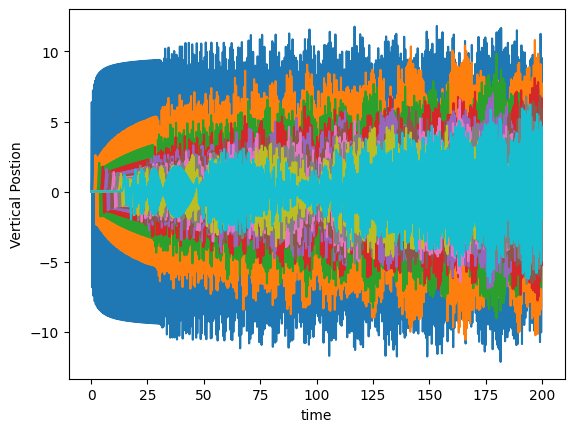

In [163]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

In [174]:
t_step = 1000
tlist = np.linspace(0,20,t_step)

In [175]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [176]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertical Postion')

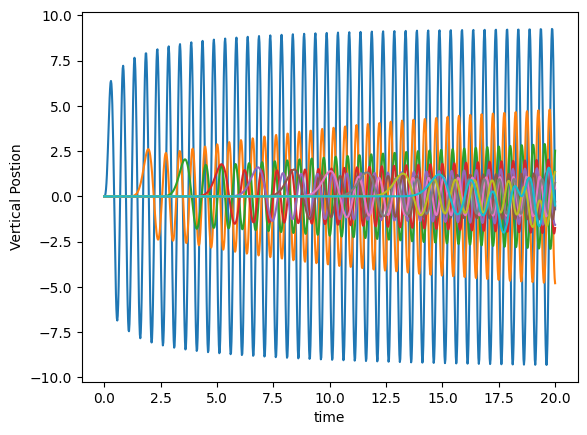

In [177]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

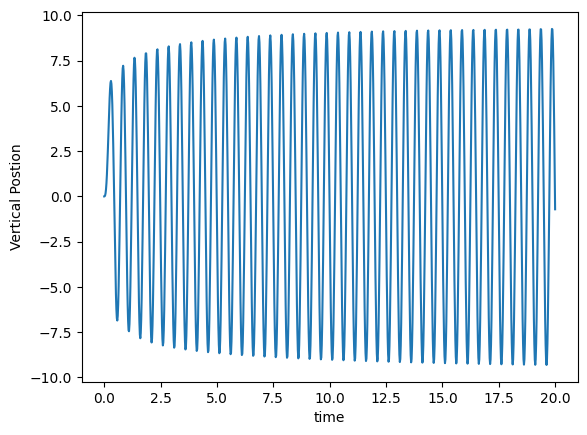

In [178]:
plt.figure()

plt.plot(tlist, Y[N-2], label = '{0}'.format(N-2))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

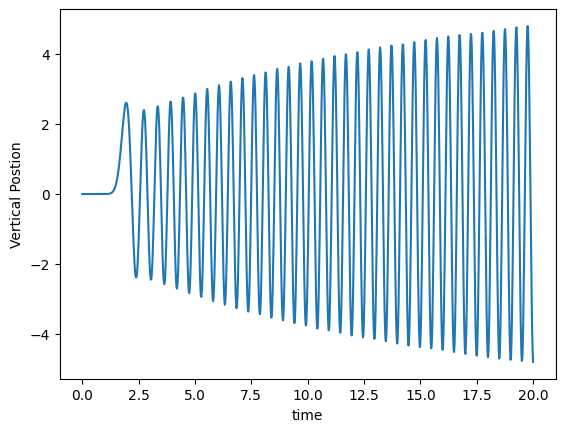

In [179]:
plt.figure()

plt.plot(tlist, Y[N-12], label = '{0}'.format(N-12))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

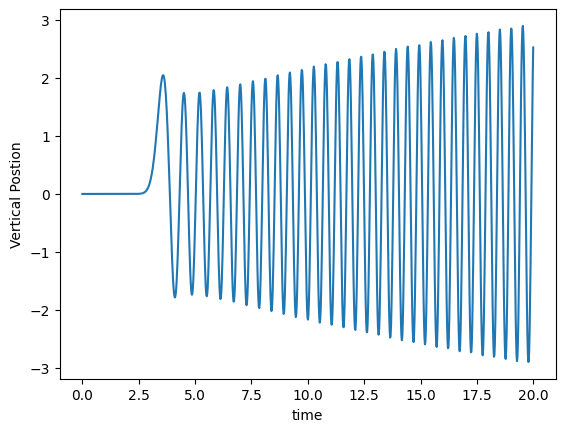

In [180]:
plt.figure()

plt.plot(tlist, Y[N-22], label = '{0}'.format(N-22))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

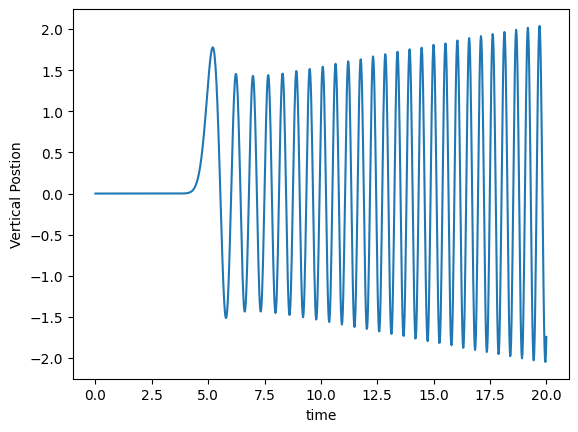

In [181]:
plt.figure()

plt.plot(tlist, Y[N-32], label = '{0}'.format(N-32))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

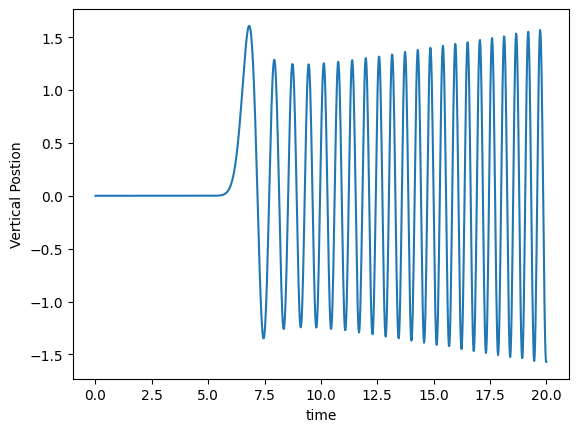

In [182]:
plt.figure()

plt.plot(tlist, Y[N-42], label = '{0}'.format(N-42))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

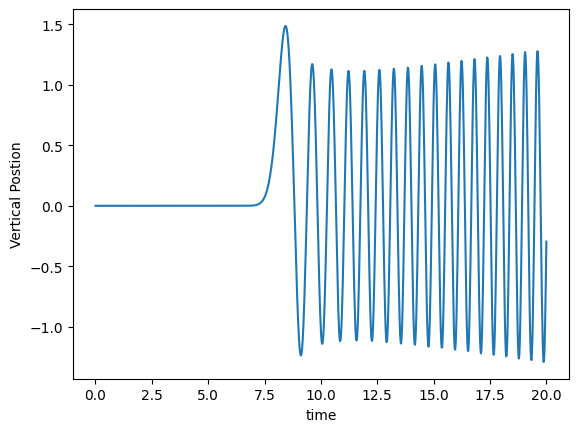

In [183]:
plt.figure()

plt.plot(tlist, Y[N-52], label = '{0}'.format(N-52))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

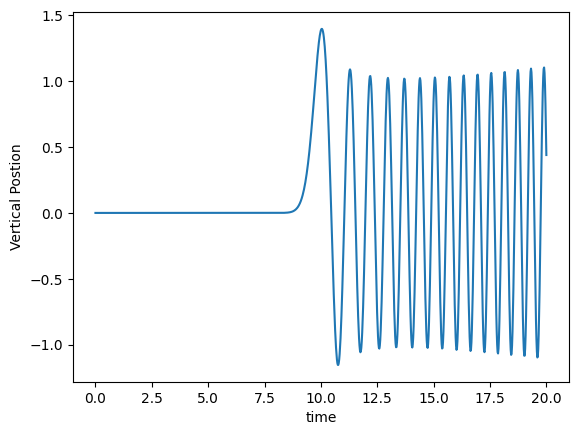

In [184]:
plt.figure()

plt.plot(tlist, Y[N-62])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

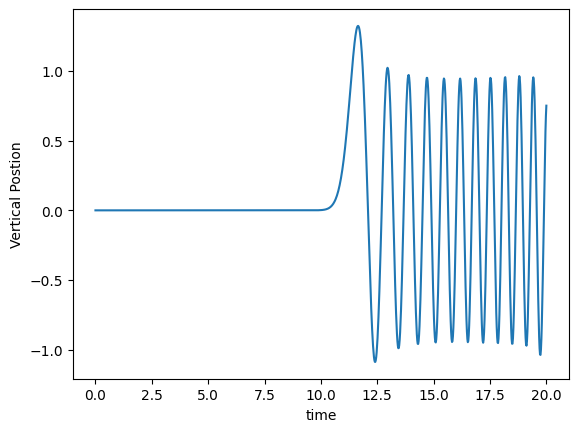

In [185]:
plt.figure()

plt.plot(tlist, Y[N-72])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

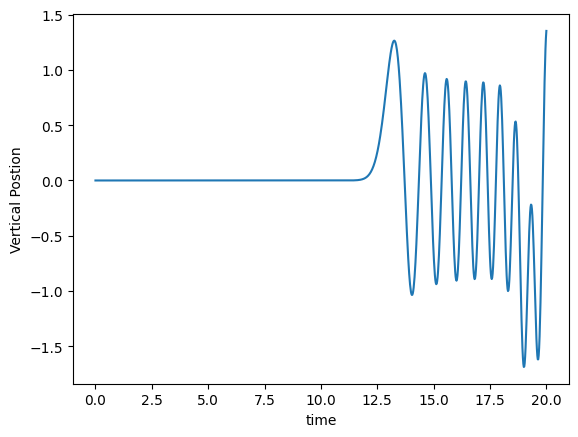

In [186]:
plt.figure()

plt.plot(tlist, Y[N-82])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

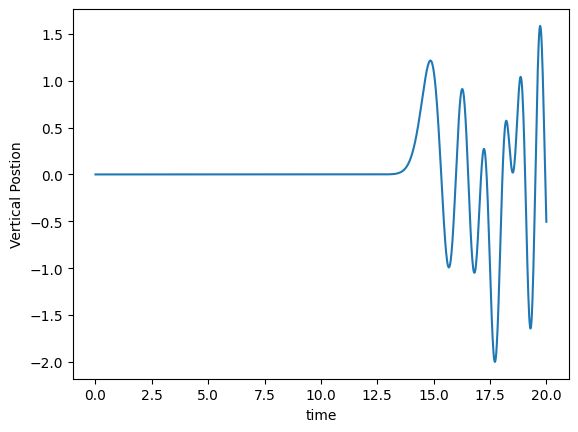

In [187]:
plt.figure()

plt.plot(tlist, Y[N-92])

plt.xlabel('time')
plt.ylabel('Vertical Postion')